### Importing Libraries

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np

### Loading Data

In [95]:
data = pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploring Data

In [96]:
data.shape

(7043, 21)

In [97]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [98]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [99]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

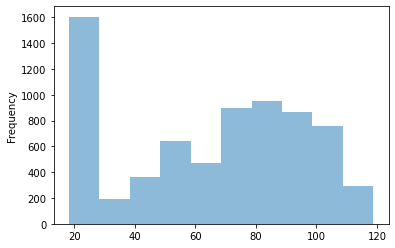

In [100]:
data['MonthlyCharges'].plot.hist(alpha=0.5)

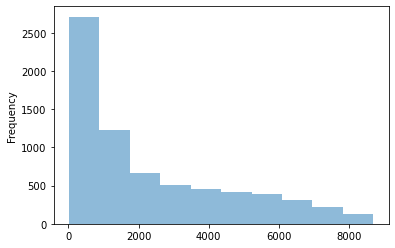

In [101]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].plot.hist(alpha=0.5)

### Cleanup

In [102]:
# Converting 'SeniorCitizen' column to Yes/No to make it categorical
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})
data["SeniorCitizen"] = data["SeniorCitizen"].astype(object)

In [103]:
# Changing 'No internet service' value to 'No' in service columns as they mean the same
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for x in services:
    data[x]  = data[x].replace({'No internet service' : 'No'})

### Visualizing current data

(array([5174.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1869.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

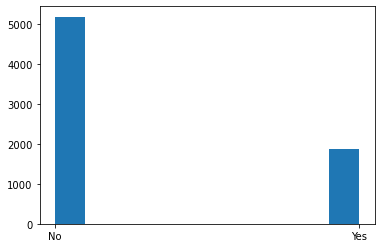

In [144]:
plt.hist(data["Churn"])

(array([243., 176., 134.,  98.,  78.,  77.,  67.,  62.,  56.,  53.,  46.,
         27.,  60.]),
 array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]),
 <a list of 13 Patch objects>)

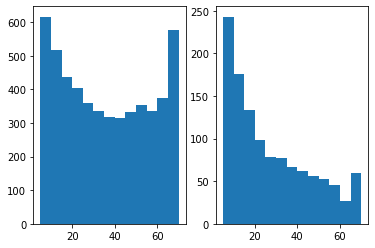

In [155]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
binlist = [5, 10, 15, 20, 25 , 30, 35, 40, 45, 50, 55, 60, 65, 70]
churned = data[data["Churn"] == "Yes"]

axes[0].hist(data["tenure"], bins = binlist) # all records
axes[1].hist(churned["tenure"], bins = binlist) # churned customers

#### As you can see above, the churning possibility is significantly less as the tenure increases

(array([150.,  55., 123., 151.,  51., 347., 356., 312., 276.,  48.]),
 array([ 18.85,  28.8 ,  38.75,  48.7 ,  58.65,  68.6 ,  78.55,  88.5 ,
         98.45, 108.4 , 118.35]),
 <a list of 10 Patch objects>)

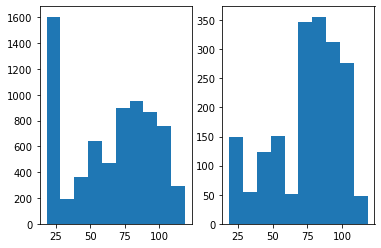

In [159]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].hist(data["MonthlyCharges"]) # all records
axes[1].hist(churned["MonthlyCharges"]) # churned customers

#### This shows that most customers who churned were paying more than $75 per month

(array([1024.,  271.,  166.,  125.,   73.,   69.,   58.,   46.,   32.,
           5.]),
 array([  18.85 ,  885.445, 1752.04 , 2618.635, 3485.23 , 4351.825,
        5218.42 , 6085.015, 6951.61 , 7818.205, 8684.8  ]),
 <a list of 10 Patch objects>)

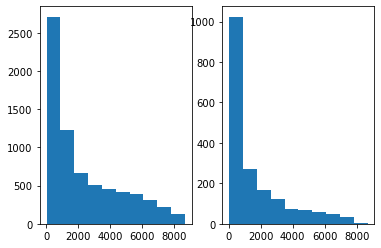

In [160]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].hist(data["TotalCharges"]) # all records
axes[1].hist(churned["TotalCharges"]) # churned customers

#### As both the graphs show an identical distribution, the Total charges don't seem to have an impact on churning

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

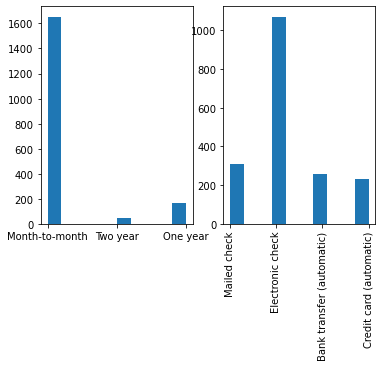

In [175]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].hist(churned["Contract"])
axes[1].hist(churned["PaymentMethod"])
plt.xticks(rotation=90)

#### Most of the churned customers were on month-to-month contract and they used electronic check payment method.

(array([ 459.,    0.,    0.,    0.,    0., 1297.,    0.,    0.,    0.,
         113.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

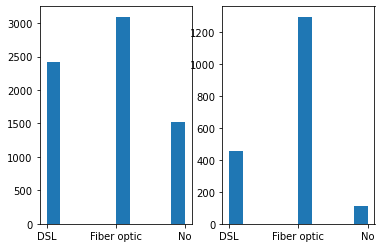

In [176]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].hist(data["InternetService"]) # all records
axes[1].hist(churned["InternetService"]) # churned customers

#### Most of the churned customers were using fiber optic services

(array([1393.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         476.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

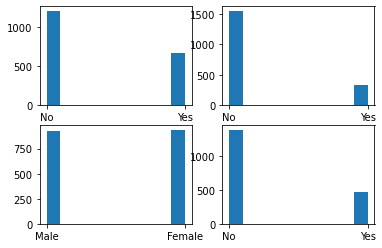

In [181]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
axes[0, 0].hist(churned["Partner"])
axes[0, 1].hist(churned["Dependents"])
axes[1, 0].hist(churned["gender"])
axes[1, 1].hist(churned["SeniorCitizen"])

#### Having dependents and being a senior citizen seem to have a big impact on churning while the gender and having a partner don't seem to contribute much

### Creating a new column based on the number of additional online services

In [201]:
svc = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for x,row in data.iterrows():
    if row['InternetService'] == "No":
        data.at[x,'num_svc'] = 0
    else:
        n = 0
        for y in svc:
            if row[y] == "Yes":
                n += 1
        data.at[x,'num_svc'] = n
    

In [205]:
data['num_svc'] = data['num_svc'].astype(int)

(array([475., 442.,   0., 370.,   0., 306., 190.,   0.,  71.,  15.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

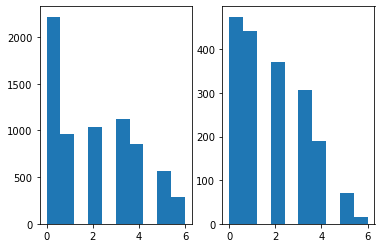

In [207]:
churned = data[data["Churn"] == "Yes"]
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].hist(data["num_svc"]) # all records
axes[1].hist(churned["num_svc"]) # churned customers

#### According to the graphs, those customer who have 4 or more additional services are very less likely to churn

#### Converting all columns to numeric values for correlation

In [211]:
# Creating a new dataframe
del datanum
datanum = data.copy(deep=True)

In [212]:
# converting 'gender'
datanum["gender"] = datanum["gender"].replace({"Male": 0, "Female": 1})
datanum["gender"] = pd.to_numeric(datanum["gender"], errors='coerce')

In [213]:
cat_var = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for x in cat_var:
    datanum[x] = datanum[x].replace({"Yes": 1, "No": 0})
    datanum[x] = pd.to_numeric(datanum[x], errors='coerce')

In [214]:
# converting 'MultipleLines'
datanum["MultipleLines"] = datanum["MultipleLines"].replace({"No": 0, "No phone service": 1, "Yes": 2})
datanum["MultipleLines"] = pd.to_numeric(datanum["MultipleLines"], errors='coerce')

In [215]:
# converting 'InternetService'
datanum["InternetService"] = datanum["InternetService"].replace({"No": 0, "DSL": 1, "Fiber optic": 2})
datanum["InternetService"] = pd.to_numeric(datanum["InternetService"], errors='coerce')

In [216]:
# converting 'Contract'
datanum["Contract"] = datanum["Contract"].replace({"Month-to-month": 0, "One year": 1, "Two year": 2})
datanum["Contract"] = pd.to_numeric(datanum["Contract"], errors='coerce')

In [217]:
# converting 'PaymentMethod'
datanum["PaymentMethod"] = datanum["PaymentMethod"].replace({"Electronic check": 0, "Mailed check": 1, 
                                                             "Bank transfer (automatic)": 2, "Credit card (automatic)": 3})
datanum["PaymentMethod"] = pd.to_numeric(datanum["PaymentMethod"], errors='coerce')

In [219]:
datanum.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,num_svc
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.006739,0.010380,0.017021,0.013773,...,0.009212,0.008393,0.010487,-0.000126,0.011754,0.005209,0.014569,-0.000048,0.008612,0.015489
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,0.259390,-0.038653,0.066572,...,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.093704,0.220173,0.102411,0.150889,0.067493
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,-0.000132,0.143106,0.141498,...,0.119999,0.124666,0.117412,0.294806,-0.014877,0.133115,0.096848,0.319072,-0.150448,0.204237
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,-0.179631,0.080972,0.023671,...,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.123844,-0.113890,0.064653,-0.164221,0.030200
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,0.033230,0.327203,0.360277,...,0.324221,0.279756,0.286111,0.671607,0.006152,0.340305,0.247900,0.825880,-0.352229,0.494263
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.093720,-0.092893,-0.052312,...,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004070,0.247398,0.113008,0.011942,-0.092810
MultipleLines,0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,0.329715,0.131128,0.226910,...,0.134768,0.274823,0.279727,0.110842,0.165146,0.038603,0.433576,0.453202,0.038037,0.329273
InternetService,0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.329715,1.000000,0.156799,0.307420,...,0.164833,0.429707,0.427264,-0.290189,0.378108,-0.178137,0.905491,0.428212,0.316846,0.464413
OnlineSecurity,0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.131128,0.156799,1.000000,0.283832,...,0.354931,0.176207,0.187398,0.245530,-0.003636,0.163367,0.296594,0.412619,-0.171226,0.571606
OnlineBackup,0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.226910,0.307420,0.283832,1.000000,...,0.294233,0.282106,0.274501,0.155085,0.126735,0.096550,0.441780,0.510100,-0.082255,0.623741


In [222]:
!pip install plotly

Using legacy 'setup.py install' for retrying, since package 'wheel' is not installed.
    Running setup.py install for retrying: started
    Running setup.py install for retrying: finished with status 'done'


In [223]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

correlation = datanum.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### Looking at the correlation matrix we can see that tenure, contract, and payment method have a high correlation with 'Churn'.

### Building Models

#### Logistic Regression

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import metrics

In [239]:
feature_cols = ['tenure', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'InternetService', 'Dependents', 'SeniorCitizen']
X = datanum[feature_cols]
y = datanum['Churn']

In [240]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [241]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

##### Creating the confusion matrix

In [243]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1162,  136],
       [ 242,  221]], dtype=int64)

Text(0.5, 352.48, 'Predicted label')

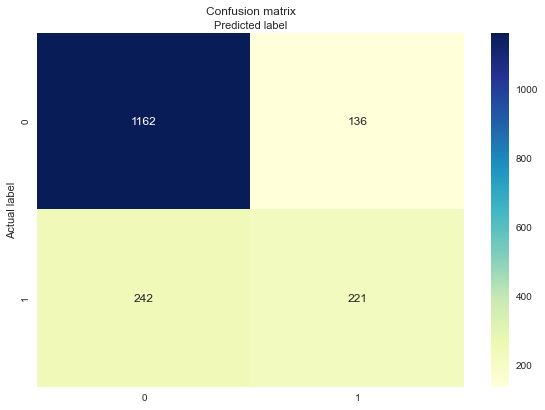

In [244]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [245]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7853492333901193
Precision: 0.6190476190476191
Recall: 0.4773218142548596


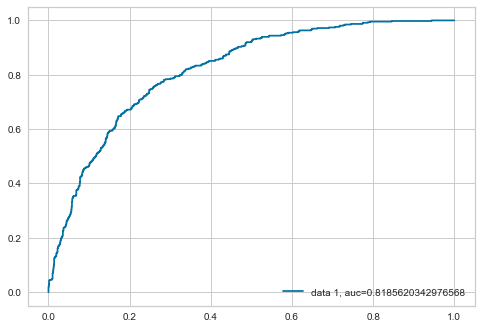

In [246]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### KNN Classifier

##### K=3

In [251]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [253]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7541169789892107


##### K=5

In [254]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7671777399204998


##### K=7

In [255]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7671777399204998


#### K=5 seems to lead best results

#### Random Forest Classifier

In [256]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7660420215786485


In [257]:
clf=RandomForestClassifier(n_estimators=150)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7632027257240205


In [259]:
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7597955706984668


#### Default estimator (100) seems to yield best results